In [39]:
#import neceassary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os
from library.sb_utils import save_file

In [2]:
# load energy and weather datasets into pandas dataframes
energy = pd.read_csv('../raw_data/energy_data.csv')
weather_wide = pd.read_csv('../raw_data/weather_wide.csv')
weather_avg = pd.read_csv('../raw_data/weather_avg.csv')


In [3]:
energy['time'] = pd.to_datetime(energy['time'], yearfirst=True, utc=True)
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil gas                        35046 non-null  float64            
 4   generation fossil hard coal                  35046 non-null  float64            
 5   generation fossil oil                        35045 non-null  float64            
 6   generation hydro pumped storage consumption  35045 non-null  float64            
 7   generation hydro run-of-river and poundage   35045 non-null  float64            
 8   generation hydro water res

In [4]:
#let's set the time as index
energy.set_index('time', inplace = True)

In [5]:
energy.head(2)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92


In [6]:
weather_avg['dt_iso'] = pd.to_datetime(weather_avg['dt_iso'], yearfirst=True, utc=True)
weather_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   dt_iso      35064 non-null  datetime64[ns, UTC]
 1   temp        35064 non-null  float64            
 2   pressure    35064 non-null  float64            
 3   humidity    35064 non-null  float64            
 4   wind_speed  35064 non-null  float64            
 5   wind_deg    35064 non-null  float64            
 6   rain_1h     35064 non-null  float64            
 7   snow_3h     35064 non-null  float64            
 8   clouds_all  35064 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 2.4 MB


In [7]:
#let's set the time as index
weather_avg.set_index('dt_iso', inplace = True)
weather_avg.head(2)

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all
dt_iso,,,,,,,,
2014-12-31 23:00:00+00:00,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0


In [8]:
weather_wide['dt_iso_'] = pd.to_datetime(weather_wide['dt_iso_'], yearfirst=True, utc=True)
weather_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   dt_iso_               35064 non-null  datetime64[ns, UTC]
 1   temp_Barcelona        35064 non-null  float64            
 2   temp_Bilbao           35064 non-null  float64            
 3   temp_Madrid           35064 non-null  float64            
 4   temp_Seville          35064 non-null  float64            
 5   temp_Valencia         35064 non-null  float64            
 6   pressure_Barcelona    35064 non-null  int64              
 7   pressure_Bilbao       35064 non-null  int64              
 8   pressure_Madrid       35064 non-null  int64              
 9   pressure_Seville      35064 non-null  int64              
 10  pressure_Valencia     35064 non-null  int64              
 11  humidity_Barcelona    35064 non-null  int64              
 12  humi

In [9]:
#let's set the time as index
weather_wide.set_index('dt_iso_', inplace = True)
#pd.set_option('display.max_columns', None)
weather_wide.head(2)

,temp_Barcelona,temp_Bilbao,temp_Madrid,temp_Seville,temp_Valencia,pressure_Barcelona,pressure_Bilbao,pressure_Madrid,pressure_Seville,pressure_Valencia,...,snow_3h_Barcelona,snow_3h_Bilbao,snow_3h_Madrid,snow_3h_Seville,snow_3h_Valencia,clouds_all_Barcelona,clouds_all_Bilbao,clouds_all_Madrid,clouds_all_Seville,clouds_all_Valencia
dt_iso_,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,281.625,269.657312,267.325,273.375,270.475,1035,1036,971,1039,1001,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2015-01-01 00:00:00+00:00,281.625,269.763500,267.325,273.375,270.475,1035,1035,971,1039,1001,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


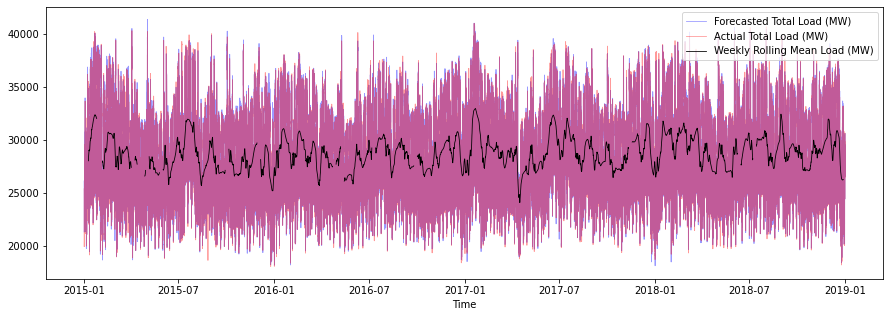

In [10]:
#Lets just take a look at a scatter plot of the time-series energy data.
weekly_rolling_load = energy['total load actual'].rolling(24*7,center=True).mean()
fig, ax = plt.subplots()
ax.plot(energy.index, energy['total load forecast'], label='Forecasted Total Load (MW)', linestyle='-', linewidth=0.8, color = 'blue',alpha = 0.4)
ax.set_xlabel('Time')
#ax.set_ylabel('Forecasted Total Load (MW)', color='blue')
ax.plot(energy.index, energy['total load actual'], label='Actual Total Load (MW)', linestyle='-', linewidth=0.8, color = 'red', alpha = 0.4)
ax.plot(weekly_rolling_load, label='Weekly Rolling Mean Load (MW)', linestyle='-', linewidth=0.8, color = 'black')
#ax2.set_ylabel('Actual Total Load (MW)', color = 'red')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.legend()
plt.show()

On a macro scale, it's evident from the overlapping time series plots that forecasted and actual load are in general agreement but the never fully match up. Let's see what a single year lloks like.

In [11]:
#Let's look at the price over the same 

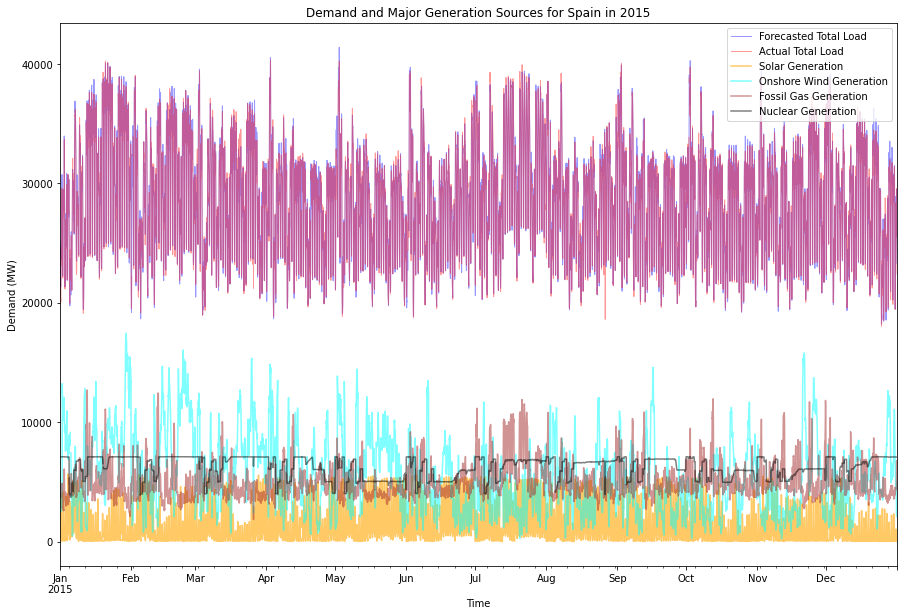

In [12]:
#Let's see what just a single year looks like:
energy_2015 = energy.loc['2015']
fig = plt.figure(figsize = (15,10))
energy_2015['total load forecast'].plot(linestyle='-', linewidth=1, label = 'Forecasted Total Load', color = 'blue',alpha = 0.4)
energy_2015['total load actual'].plot(linestyle='-', linewidth=1, label = 'Actual Total Load', color = 'red',alpha = 0.4)

#lets also see a few of the most important generation sources:
energy_2015['generation solar'].plot(label = 'Solar Generation', color = 'orange',alpha = 0.6)
energy_2015['generation wind onshore'].plot(label = 'Onshore Wind Generation', color = 'cyan',alpha = 0.5)
energy_2015['generation fossil gas'].plot(label = 'Fossil Gas Generation', color = 'brown',alpha = 0.5)
energy_2015['generation nuclear'].plot(label = 'Nuclear Generation', color = 'black',alpha = 0.5)

plt.ylabel('Demand (MW)')
plt.xlabel("Time")
plt.title("Demand and Major Generation Sources for Spain in 2015")
plt.legend()
plt.show()

We can see some weekly seasonality in the total/forecast load (with short dips seen weekly - these being weekends when offices are not operating). Overall the highest load seems to be in both January (when heating and lighting demand due to cold, short days are both high) and in July (when air conditioning demand is highest). We can see that Fossil Gas generation is high in July, likely do to increased air conditioning use. And we can also see that Onshore Wind generation is highest in late winter through late spring. Nuclear generation follows an odd pattern of reduced generation around the first week of every month; this may be due to some maintainance or safety processes performed monthly. This scale is too large to see much detail for the solar generation, as this has daily seasonality.

Text(0.5, 1.0, 'Demand and Major Generation Sources for Spain in 2015-2018')

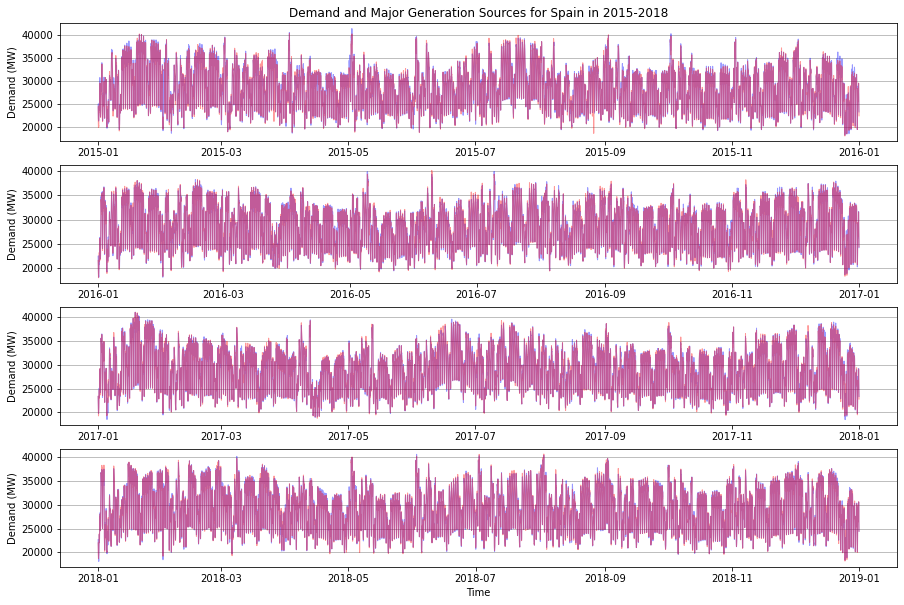

In [13]:
#Let's plot each year separately but view all 4 years together:
energy_2016 = energy.loc['2016']
energy_2017 = energy.loc['2017']
energy_2018 = energy.loc['2018']

fig, ax = plt.subplots(4,1, figsize = (15,10))

ax[0].plot(energy_2015['total load forecast'], linewidth=1, label = 'Forecasted Total Load', color = 'blue',alpha = 0.4)
ax[0].plot(energy_2015['total load actual'], linewidth=1, label = 'Actual Total Load', color = 'red',alpha = 0.4)
ax[0].yaxis.set_major_locator(MultipleLocator(5000))
ax[0].grid(which='major',axis='y')

ax[1].plot(energy_2016['total load forecast'], linewidth=1, label = 'Forecasted Total Load', color = 'blue',alpha = 0.4)
ax[1].plot(energy_2016['total load actual'], linewidth=1, label = 'Actual Total Load', color = 'red',alpha = 0.4)
ax[1].grid(which='major',axis='y')

ax[2].plot(energy_2017['total load forecast'], linewidth=1, label = 'Forecasted Total Load', color = 'blue',alpha = 0.4)
ax[2].plot(energy_2017['total load actual'], linewidth=1, label = 'Actual Total Load', color = 'red',alpha = 0.4)
ax[2].grid(which='major',axis='y')

ax[3].plot(energy_2018['total load forecast'], linewidth=1, label = 'Forecasted Total Load', color = 'blue',alpha = 0.4)
ax[3].plot(energy_2018['total load actual'], linewidth=1, label = 'Actual Total Load', color = 'red',alpha = 0.4)
ax[3].grid(which='major',axis='y')

ax[0].set_ylabel('Demand (MW)')
ax[1].set_ylabel('Demand (MW)')
ax[2].set_ylabel('Demand (MW)')
ax[3].set_ylabel('Demand (MW)')
ax[3].set_xlabel("Time")
ax[0].set_title("Demand and Major Generation Sources for Spain in 2015-2018")

Overall it looks like the four years follow a very similar pattern (to be expected). We can't see any drastic differences between the four years

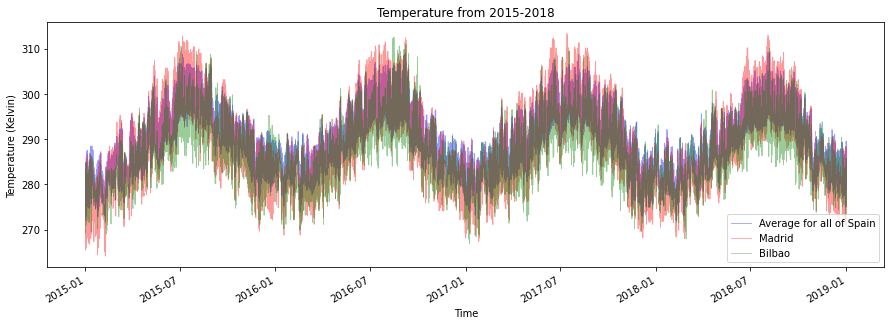

In [14]:
#some other plots we could try include temps for all 5 cities and the average temp to see what kind of spread there is
fig = plt.figure(figsize = (15,5))
weather_avg['temp'].plot(label = 'Average for all of Spain', linestyle='-', linewidth=0.8, color = 'blue',alpha = 0.4)
weather_wide['temp_Madrid'].plot(label = 'Madrid', linestyle='-', linewidth=0.8, color = 'red', alpha = 0.4)
weather_wide['temp_Bilbao'].plot(label = 'Bilbao', linestyle='-', linewidth=0.8, color = 'green', alpha = 0.4)
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.title("Temperature from 2015-2018")
plt.legend()
plt.show()

That's quite messy even with only the average and two cities. But we can see the yearly temperature trend and that the average matches the trend seen in Bilbao and Madrid. We can also glean that Madrid is hotter than average and Bilbao is cooler than average in the summer. Next let's try some scatter plots to see what features might be correlated to generation and load.

In [15]:
#Let's create a combined dataframe with energy and weather_avg
combined_avg = energy.join(weather_avg, on='time')
combined_avg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other         

In [16]:
#now that the df are merged we can delete rows with missing values
combined_avg = combined_avg.dropna()
combined_avg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35018 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35018 non-null  float64
 1   generation fossil brown coal/lignite         35018 non-null  float64
 2   generation fossil gas                        35018 non-null  float64
 3   generation fossil hard coal                  35018 non-null  float64
 4   generation fossil oil                        35018 non-null  float64
 5   generation hydro pumped storage consumption  35018 non-null  float64
 6   generation hydro run-of-river and poundage   35018 non-null  float64
 7   generation hydro water reservoir             35018 non-null  float64
 8   generation nuclear                           35018 non-null  float64
 9   generation other         

Text(0.5, 1.03, 'Energy and Average Weather Feature Correlation')

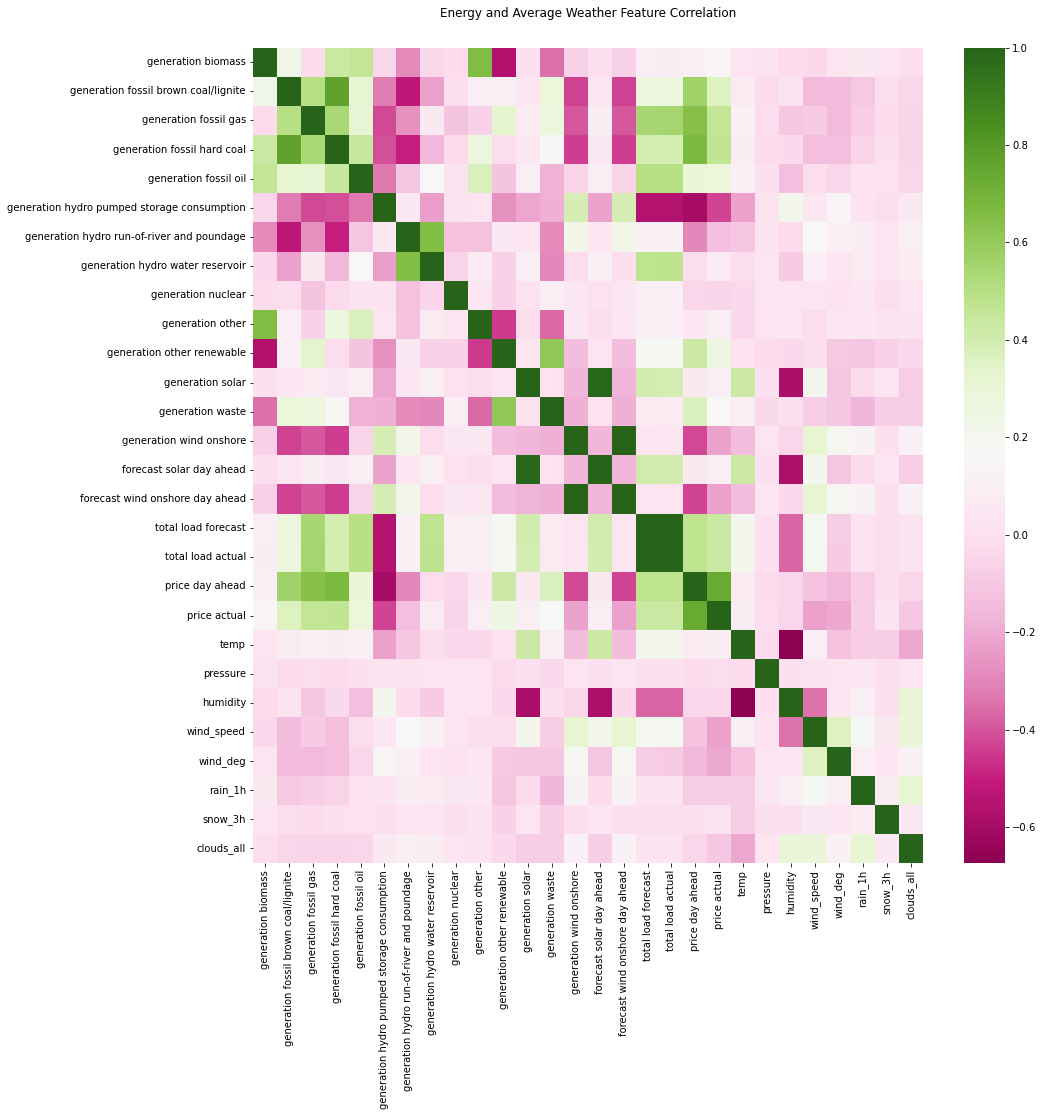

In [17]:
#let's try a heatmap on this df now
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(combined_avg.corr(), cmap='PiYG')
ax.set_title("Energy and Average Weather Feature Correlation",y=1.03)

Somewhat surprisingly, there are not a lot of strong correlations between our weather features and generation/load features. One thing to keep in mind is that the heatmap showing low or zero correlation may indicate that a certain feature is actually well correlated but with both high and low values, and so they cancel each other out and show zero correlation (see number 2 below). 
Some of the correlations we see from the heatmap include:
1. A strong negative correlation between humidity and: temperature, forecast solar, and solar generation. This indicates that humidity must be highest at night when temp is lower which is also when solar is not being generated. But humidity is more highly correlated with solar than temperature is with solar (probably due to the fact that solar is still generated in the winter when temperatures are low).
2. Fossil (brown coal/lignite, gas, hard coal, and oil) generation types are moderately positively correlated with actual price and forecasted price, indicating that energy prices are higher when more fossil generation is needed to meet demand. Although the heatmap shows zero correlation with fossil generation, we know it is actually likely correlated to both low and high temperatures because fossil generation increases with high heating and cooling demands in winter and summer, respectively, thus showing zero correlation on the whole.
3. Wind speed is only weakly positively correlated with wind generation.
4. There is a moderate positive correlation between forecast price and waste generation and other renewable generation, but then almost zero correlation between these two energy sources and actual price. This could mean that there is discrepancy between how much generation from waste and other renewables planners would like to use and how much actually ends up getting used to meet demand?
5. One more interesting relationship is a strong negative correlation between hydro pumped storage consumption (the energy consumed to pump water back to the upper reservoir in a pumped storage system) and forecasted total load, actual total load, forecast price, and actual price. This illustrates that excess energy at times of low demand (low price) is used to essentially store electricity for future use at times of higher demand. This relationship may not be super important to the overall forecasting goal but it is very interesting to note!

The lack of strong correlations with weather data may be an indication that time series analysis will provide a better forecast than regression, but we shall see...

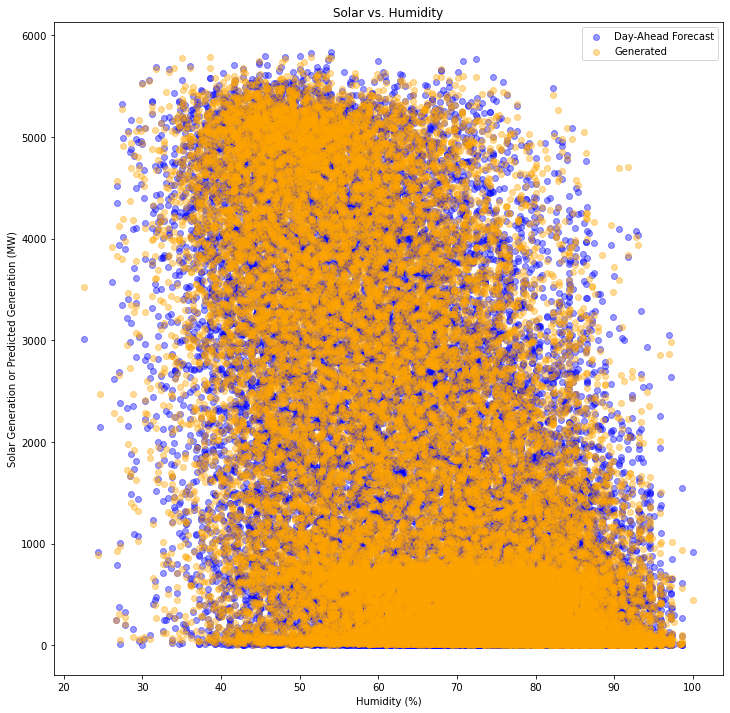

In [18]:
#Let's plot up some of the correlations we noted from the heatmap
#First, humidity vs forecast and actual solar generation and then the same for temperature
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(combined_avg['humidity'], combined_avg['forecast solar day ahead'], label = "Day-Ahead Forecast", color = 'blue', alpha = 0.4)
ax.scatter(combined_avg['humidity'], combined_avg['generation solar'], label = "Generated", color = 'orange', alpha = 0.4)
plt.xlabel('Humidity (%)')
plt.ylabel('Solar Generation or Predicted Generation (MW)')
plt.legend()
plt.title("Solar vs. Humidity")
plt.show()

We indeed see a moderate negative correlation, and then a whole lot of points with zero solar and high humidity (indicating night time).

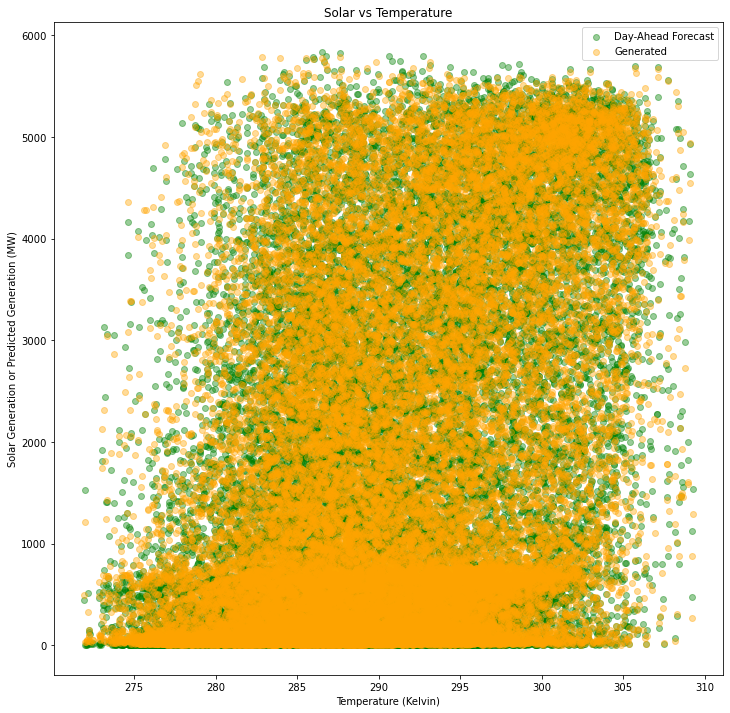

In [19]:
#First, humidity vs forecast and actual solar generation and then the same for temperature
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(combined_avg['temp'], combined_avg['forecast solar day ahead'], label = "Day-Ahead Forecast", color = 'green', alpha = 0.4)
ax.scatter(combined_avg['temp'], combined_avg['generation solar'], label = "Generated", color = 'orange', alpha = 0.4)

plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Solar Generation or Predicted Generation (MW)')
plt.legend()
plt.title("Solar vs Temperature")
plt.show()


We generally see a weak to moderate positive correlation with temperature, and again a huge band with zero to near zero solar generation (night time).

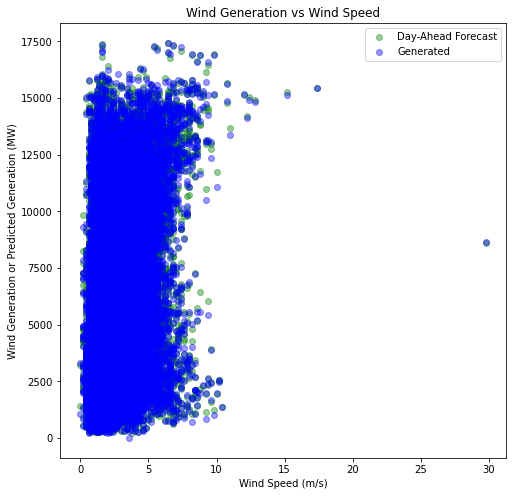

In [20]:
#let's check out wind generation vs wind speed
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(combined_avg['wind_speed'], combined_avg['forecast wind onshore day ahead'], label = "Day-Ahead Forecast", color = 'green', alpha = 0.4)
ax.scatter(combined_avg['wind_speed'], combined_avg['generation wind onshore'], label = "Generated", color = 'blue', alpha = 0.4)

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Generation or Predicted Generation (MW)')
plt.legend()
plt.title("Wind Generation vs Wind Speed")
plt.show()
#it looks like a couple outliers of high wind speed could be affecting the plot, let's try plotting without these

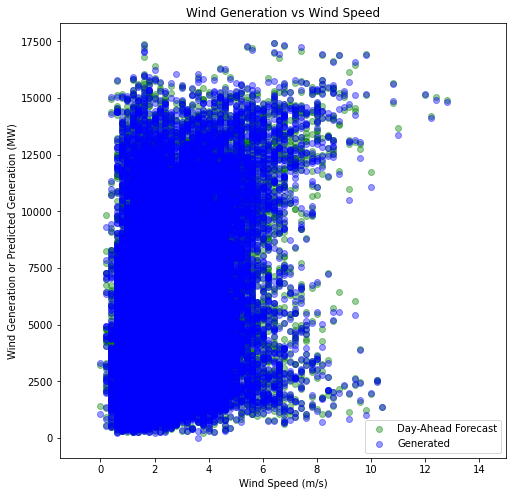

In [21]:
#for winds less than 30 m/s
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(combined_avg['wind_speed'], combined_avg['forecast wind onshore day ahead'], label = "Day-Ahead Forecast", color = 'green', alpha = 0.4)
ax.scatter(combined_avg['wind_speed'], combined_avg['generation wind onshore'], label = "Generated", color = 'blue', alpha = 0.4)
ax.set_xlim(right=15)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Generation or Predicted Generation (MW)')
plt.legend()
plt.title("Wind Generation vs Wind Speed")
plt.show()

With outliers removed from the plot space, a slight positive correlation is visible, but the plot mostly illustrates that wind generation can be high at even at low windpseed.

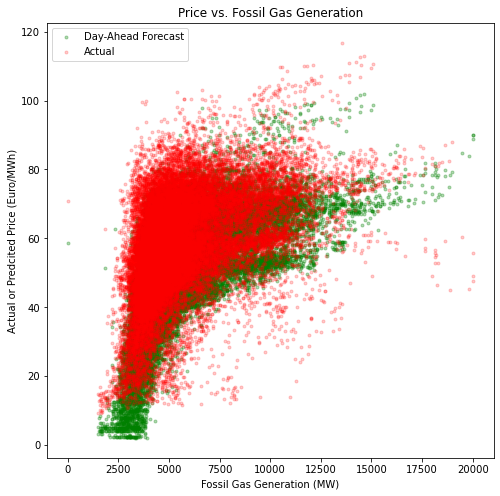

In [137]:
#let's check out gas generation vs price
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(combined_avg['generation fossil gas'], combined_avg['price day ahead'], label = "Day-Ahead Forecast", color = 'green', alpha = 0.3, marker = '.')
ax.scatter(combined_avg['generation fossil gas'], combined_avg['price actual'], label = "Actual", color = 'red', alpha = 0.2, marker = '.')

plt.xlabel('Fossil Gas Generation (MW)')
plt.ylabel('Actual or Predcited Price (Euro/MWh)')
plt.legend()
plt.title("Price vs. Fossil Gas Generation")
plt.show()

This shows a relatively strong, positive, and non-linear correlation and we can also see that the day ahead forecasted price tends to be consistently a bit lower (and also the amount generated a bit higher) than the actual price ends up being. This may indicate a weakness in the TSO prediction model if it is consistently predicting a lower price.

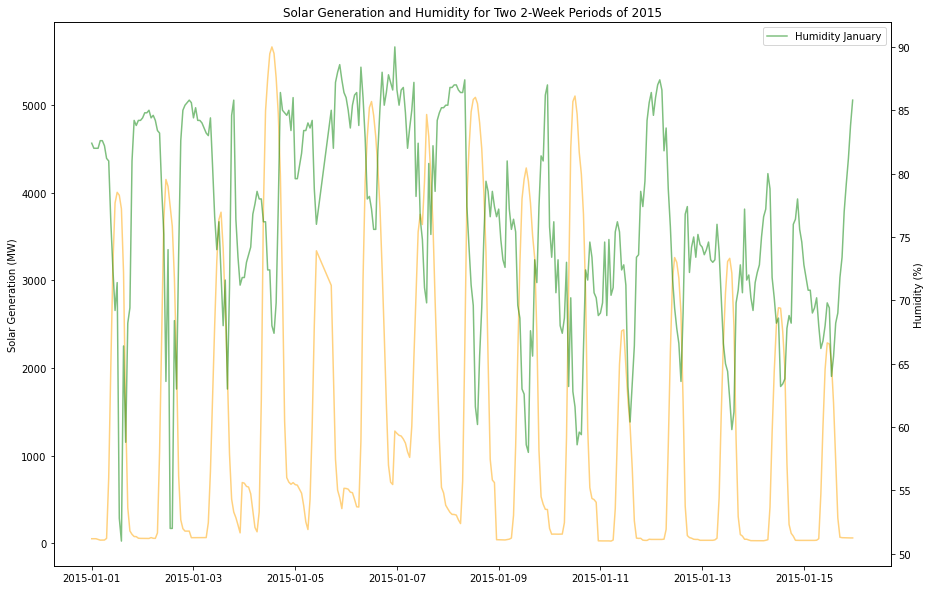

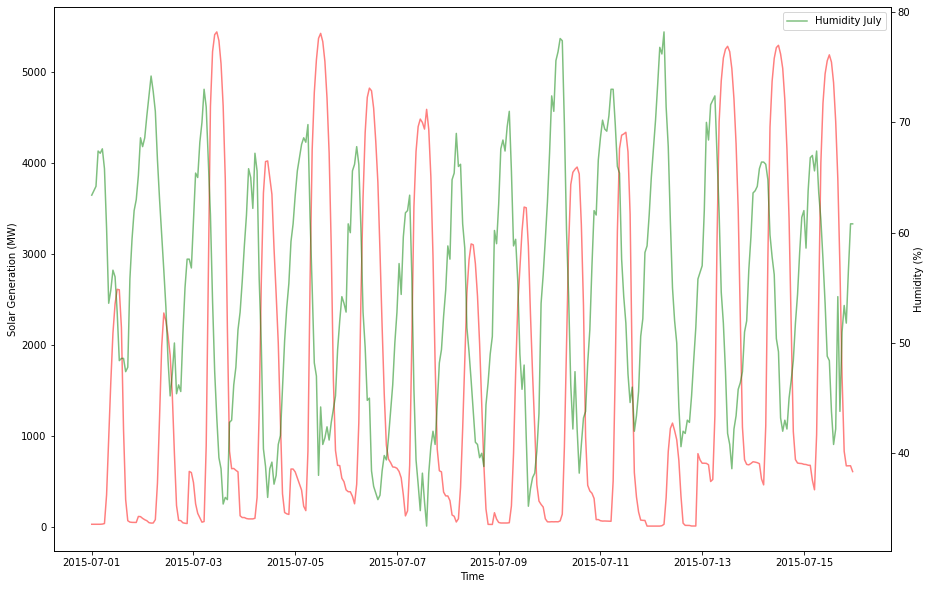

In [138]:
#let's go back and try some more targeted time series plots now that we have some more relationships to target
#one winter month and one summer month of one year of solar and humidity on two y-axes vs time on x
jan_2015 = combined_avg.loc['2015-01-01':'2015-01-15']
july_2015 = combined_avg.loc['2015-07-01':'2015-07-15']

fig, ax = plt.subplots(figsize =(15,10))
ax.plot(jan_2015.index, jan_2015['generation solar'], label = 'Solar Generation January', color = 'orange', alpha = 0.5)
ax2 = ax.twinx()
ax2.plot(jan_2015.index, jan_2015['humidity'], label = 'Humidity January', color = 'green', alpha = 0.5)
ax.set_ylabel('Solar Generation (MW)')
ax2.set_ylabel('Humidity (%)')
plt.xlabel("Time")
plt.title("Solar Generation and Humidity for Two 2-Week Periods of 2015")
plt.legend()
plt.show()

# and the same for July:
fig, ax = plt.subplots(figsize =(15,10))
ax.plot(july_2015.index, july_2015['generation solar'], label = 'Solar Generation July', color = 'red', alpha = 0.5)
ax2 = ax.twinx()
ax2.plot(july_2015.index, july_2015['humidity'], label = 'Humidity July', color = 'green', alpha = 0.5)
ax.set_ylabel('Solar Generation (MW)')
ax2.set_ylabel('Humidity (%)')
ax.set_xlabel("Time")
plt.xlabel("Time")
#plt.title("Solar Generation and Humidity for Two Months of 2015")
plt.legend()
plt.show()

C:\Users\ehard\AppData\Local\Temp/ipykernel_21344/2949981062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_2015['ma_solar'] = jan_2015['generation solar'].rolling(6).mean()
C:\Users\ehard\AppData\Local\Temp/ipykernel_21344/2949981062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_2015['ma_humid'] = jan_2015['humidity'].rolling(6).mean()
C:\Users\ehard\AppData\Local\Temp/ipykernel_21344/2949981062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

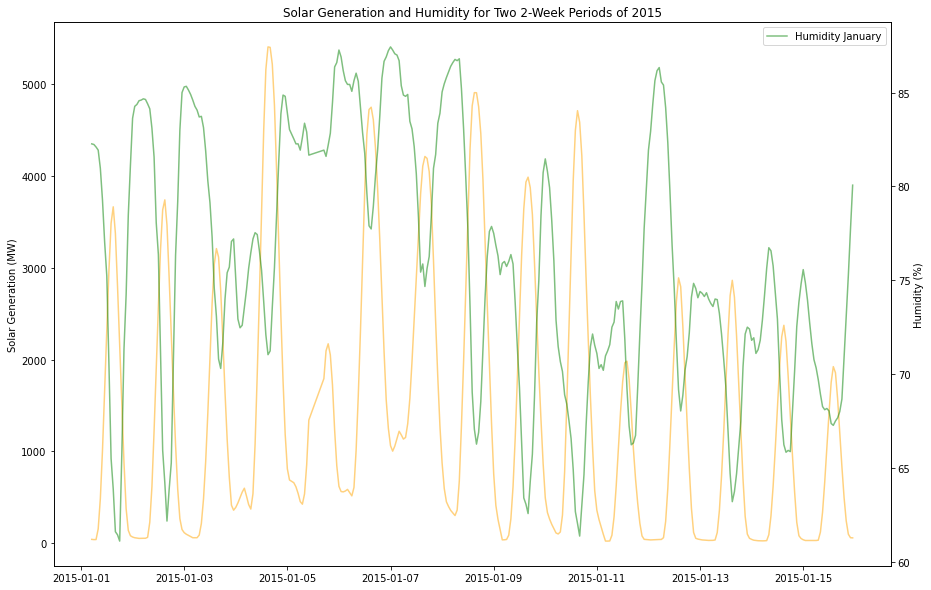

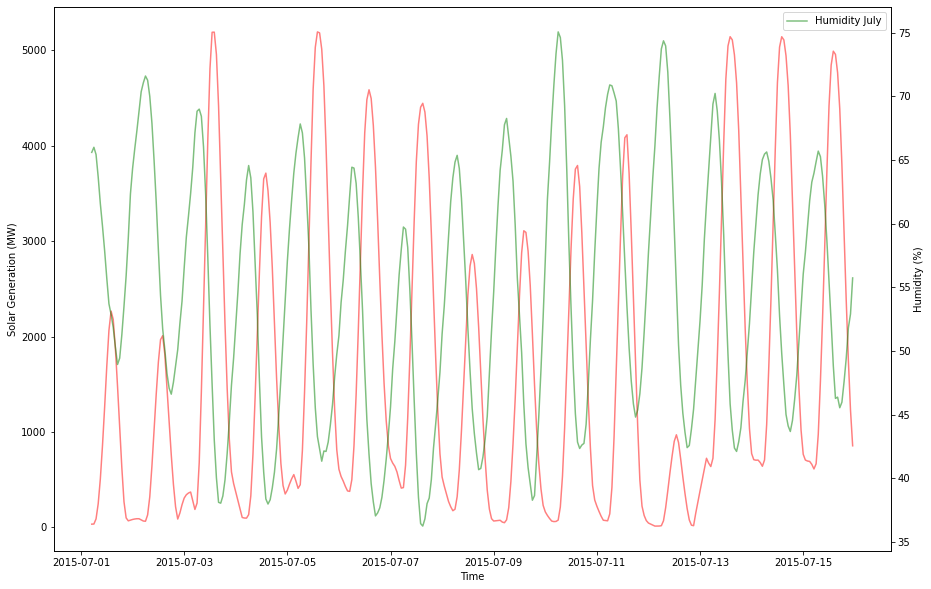

In [139]:
# smoothed

#let's also try a moving average to smooth the time data to make it easier to look at:
jan_2015['ma_solar'] = jan_2015['generation solar'].rolling(6).mean()
jan_2015['ma_humid'] = jan_2015['humidity'].rolling(6).mean()
july_2015['ma_solar'] = july_2015['generation solar'].rolling(6).mean()
july_2015['ma_humid'] = july_2015['humidity'].rolling(6).mean()

fig, ax = plt.subplots(figsize =(15,10))
ax.plot(jan_2015.index, jan_2015['ma_solar'], label = 'Solar Generation January', color = 'orange', alpha = 0.5)
ax2 = ax.twinx()
ax2.plot(jan_2015.index, jan_2015['ma_humid'], label = 'Humidity January', color = 'green', alpha = 0.5)
ax.set_ylabel('Solar Generation (MW)')
ax2.set_ylabel('Humidity (%)')
plt.xlabel("Time")
plt.title("Solar Generation and Humidity for Two 2-Week Periods of 2015")
plt.legend()
plt.show()

# and the same for July:
fig, ax = plt.subplots(figsize =(15,10))
ax.plot(july_2015.index, july_2015['ma_solar'], label = 'Solar Generation July', color = 'red', alpha = 0.5)
ax2 = ax.twinx()
ax2.plot(july_2015.index, july_2015['ma_humid'], label = 'Humidity July', color = 'green', alpha = 0.5)
ax.set_ylabel('Solar Generation (MW)')
ax2.set_ylabel('Humidity (%)')
ax.set_xlabel("Time")
plt.xlabel("Time")
#plt.title("Solar Generation and Humidity for Two Months of 2015")
plt.legend()
plt.show()

The smoothed curves using a six-hour rolling average do look a lot nicer. We can tell that humidity is generally low during the day time and high at night, so this is indeed very well correlated with solar generation. As expected, solar generation is higher in July than January when there are more hours of daylight. The overnight humidity is also typically about 20% lower in July than in January while the daily high humidity is also lower a bit lower on average in July. 

[Text(0.5, 0, 'Total Hourly Demand (MW)')]

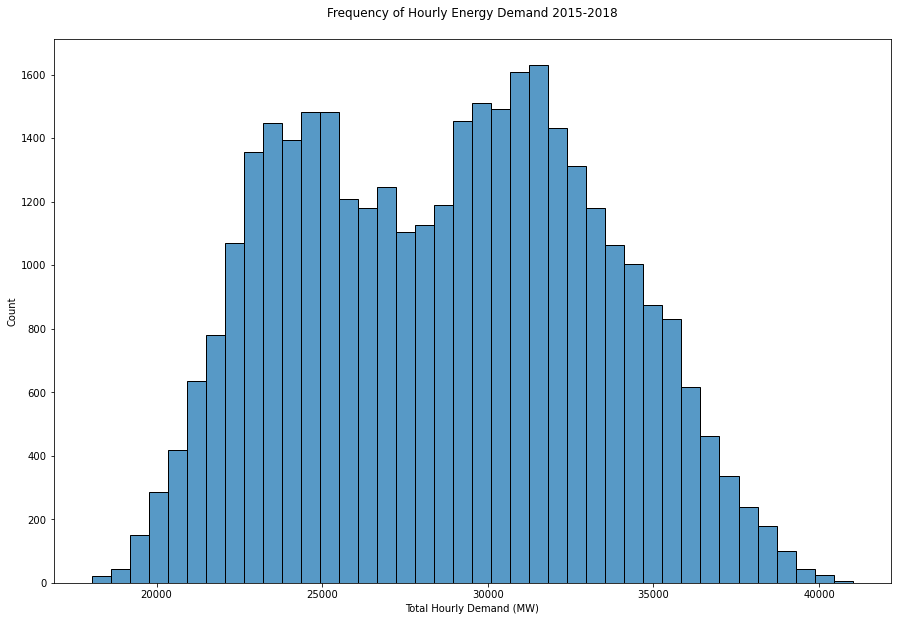

In [140]:
#Let's do a series of visualizations for the primary target, total load (hourly energy demand)
#First, a histogram of total load
plt.figure(figsize=(15,10))
g = sns.histplot(combined_avg, x="total load actual", bins = 40)
g.set_title("Frequency of Hourly Energy Demand 2015-2018", y = 1.03)
g.set(xlabel= "Total Hourly Demand (MW)")

Even trying many different binning options, it appears we have a bi-modal distribution of total load. The two groups could either be day vs night, or summer vs winter. I'm not sure how to tell which...

[Text(0.5, 0, 'Energy Price (Euro/MWh)')]

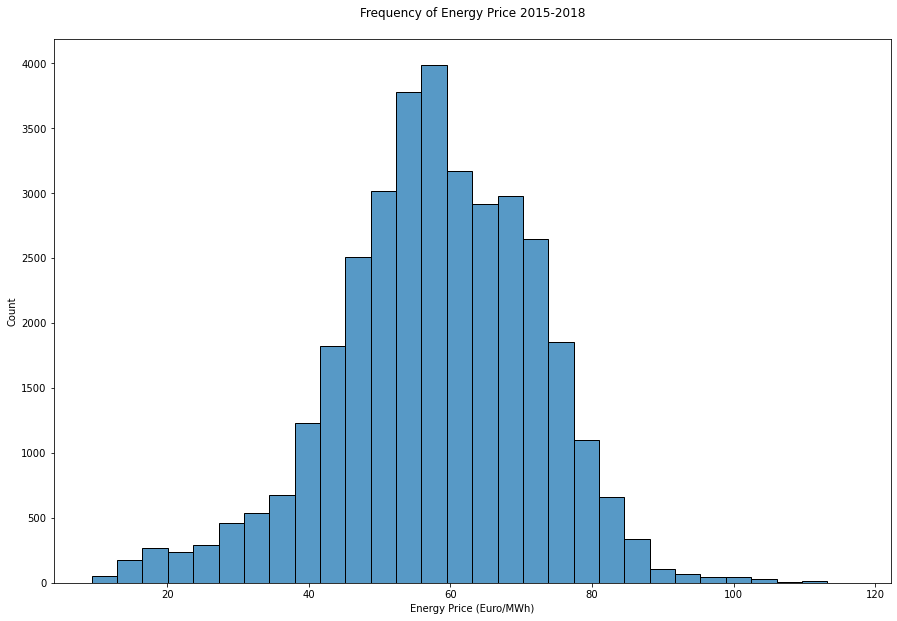

In [141]:
#Let's check out the price distribution also
plt.figure(figsize=(15,10))
g = sns.histplot(combined_avg, x="price actual",bins=30)
g.set_title("Frequency of Energy Price 2015-2018", y = 1.03)
g.set(xlabel= "Energy Price (Euro/MWh)")

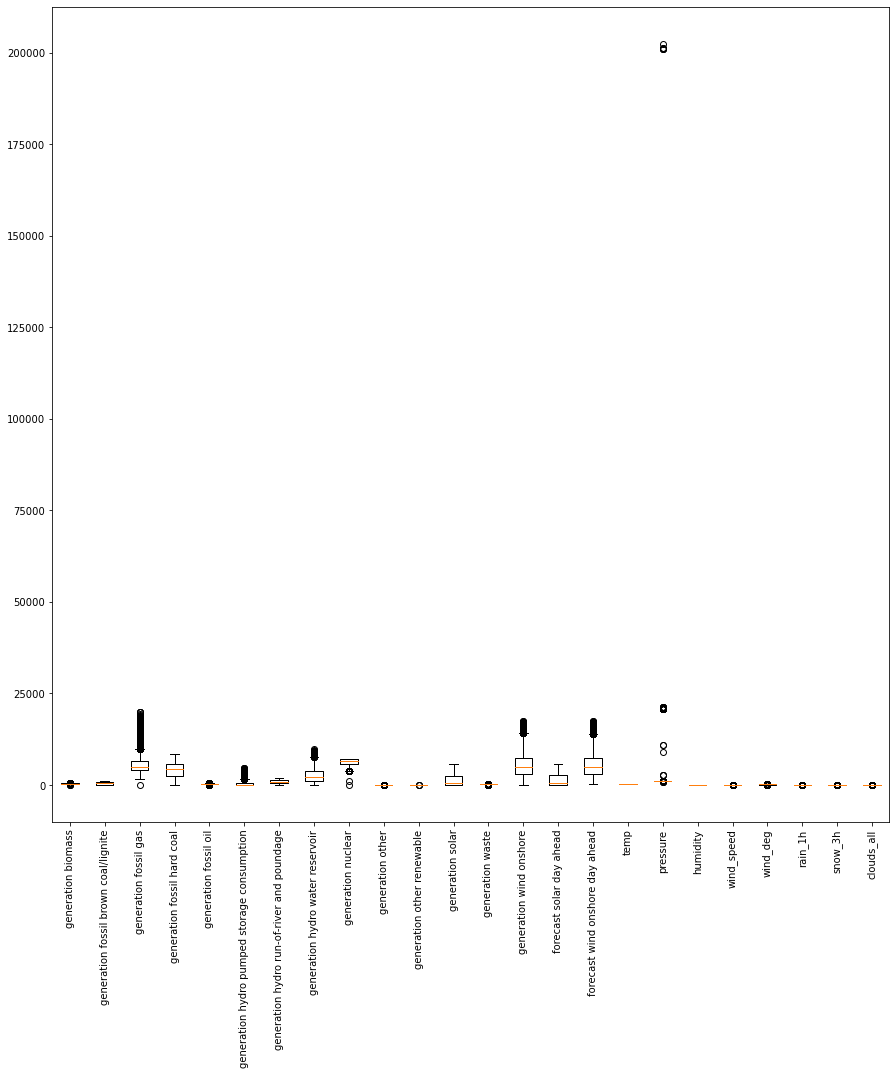

In [37]:
#let's see boxplots of features to check for outliers:
labels = list(combined_avg.drop(['total load forecast','total load actual','price day ahead','price actual'], axis=1))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot()
bp = ax.boxplot(combined_avg.drop(['total load forecast','total load actual','price day ahead','price actual'], axis=1))
ax.set_xticklabels(labels=labels, rotation=90)
plt.show()

We have some extreme outliers of atmospheric pressure. They could accidentally be in another unit, like Pascals, instead of hPa (millibar). But even then they would be too high to be correct. According to Wikipedia, the highest atmospheric pressure ever recorded was ~1085 millibar. I'll impute any pressures above 1085 millibar with the median pressure.

In [46]:
#impute impossibly high atm pressure with median
median_pr = np.median(combined_avg['pressure'])
outliers = combined_avg['pressure'] > 1085
combined_avg['pressure'].mask(outliers, other=median_pr, inplace=True)

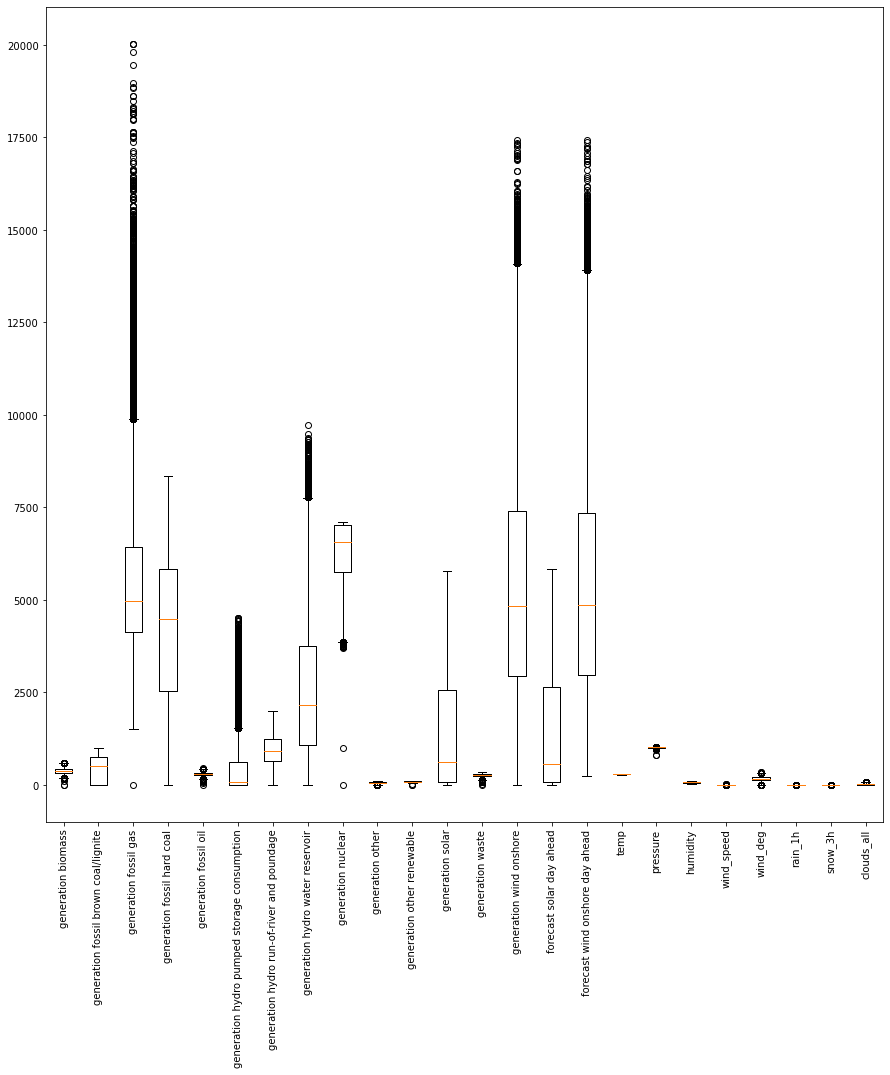

In [47]:
#replot boxplots
labels = list(combined_avg.drop(['total load forecast','total load actual','price day ahead','price actual'], axis=1))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot()
bp = ax.boxplot(combined_avg.drop(['total load forecast','total load actual','price day ahead','price actual'], axis=1))
ax.set_xticklabels(labels=labels, rotation=90)
plt.show()